# Data Analysis of Iris Dataset

In [ ]:
# Module imports
import sys, platform, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings, random
warnings.filterwarnings("ignore")
import os

np.random.seed(42)
random.seed(42)

import sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from scipy.stats import f_oneway, kruskal, shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd


## Loading data

In [2]:
df = pd.read_csv("iris/iris.csv", header=0)
display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Description of dataset

In [26]:
display(df.info())
display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


### Checking data quality

In [27]:
print("Missing values per column:\n", df.isna().sum())
print("Duplicate rows:", df.duplicated().sum())

Missing values per column:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Duplicate rows: 3


I have not found any missing values. Duplicates reflect real repeated values in the source.

### Summaries

In [30]:
features = ["sepal_length","sepal_width",
            "petal_length","petal_width"]
for feat in features:
    desc = df[feat].describe().T
    display(desc)
    desc.to_csv(os.path.join("summaries", f"{feat}.csv"))

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64

I saved summaries for sepal length, sepal width, petal length, petal width into subfolder summaries.

In [31]:
# Loop through species
for sp, group in df.groupby("species"):
    print(f"\nSummary for species: {sp}\n")   # <-- species name shown
    desc = group.describe().T                 # transpose for nicer layout
    display(desc)
    desc.to_csv(os.path.join("summaries", f"{sp}_summary.csv"))


Summary for species: Iris-setosa



,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,5.006,0.352490,4.3,4.800,5.0,5.200,5.8
sepal_width,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
petal_length,50.0,1.464,0.173511,1.0,1.400,1.5,1.575,1.9
petal_width,50.0,0.244,0.107210,0.1,0.200,0.2,0.300,0.6



Summary for species: Iris-versicolor



,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,5.936,0.516171,4.9,5.600,5.90,6.3,7.0
sepal_width,50.0,2.770,0.313798,2.0,2.525,2.80,3.0,3.4
petal_length,50.0,4.260,0.469911,3.0,4.000,4.35,4.6,5.1
petal_width,50.0,1.326,0.197753,1.0,1.200,1.30,1.5,1.8



Summary for species: Iris-virginica



,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,6.588,0.635880,4.9,6.225,6.50,6.900,7.9
sepal_width,50.0,2.974,0.322497,2.2,2.800,3.00,3.175,3.8
petal_length,50.0,5.552,0.551895,4.5,5.100,5.55,5.875,6.9
petal_width,50.0,2.026,0.274650,1.4,1.800,2.00,2.300,2.5


I saved summaries for entire species into folder summaries

## Explanatory data analysis

### Histograms of morphological values
Histogram is the plot that shows distribution of values. I decided to add lines of kernel density estimation that smooths data distribution for each species of *Iris* for better data representation.\
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

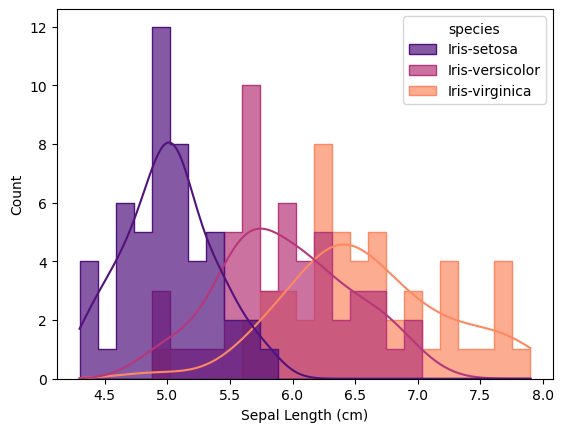

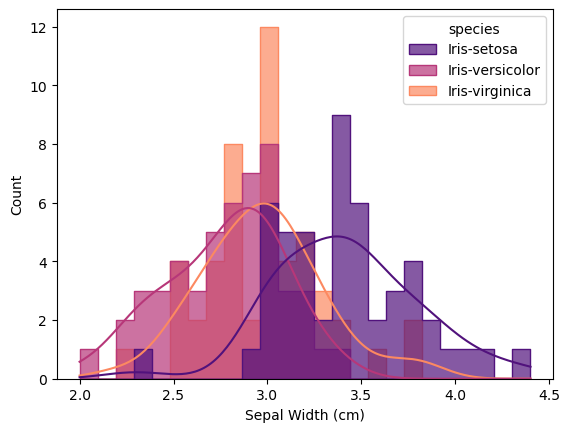

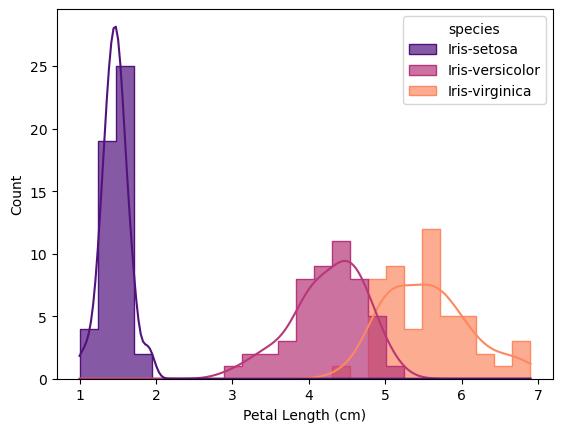

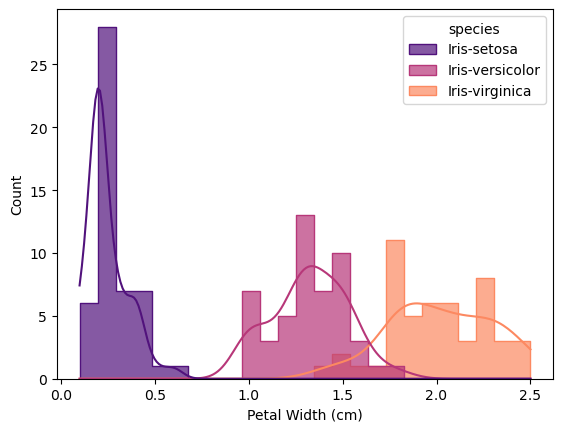

In [32]:
features = ["sepal_length","sepal_width","petal_length","petal_width"]

for feat in features:
    plt.figure()
    sns.histplot(df, x=feat, hue="species", bins=25, kde=True,
                 element="step", fill=True, palette="magma", alpha=0.7)
    plt.xlabel(feat.replace("_"," ").title() + " (cm)")
    plt.savefig(os.path.join("plots", f"{feat}_hist.png"))
    plt.show()


According to histograms, flowers of *Iris Virginica* and *Iris Versicolor* share similar values, with mean value for *Iris Virginica's* flowers higher in any category than for flowers of *Iris Versicolor*. Flowers of *Iris Setosa* differ from these species with lower values for petal length, petal width, sepal length, but higher values for sepal width than for *Iris Virginica* and *Iris Versicolor*. All histograms are saved in the folder histograms.

### Violin plot
Violin plot combines the information of boxplot and density plot. The "violin” shows the full distribution of a feature for each Iris species, while also marking the median and quartiles.
https://seaborn.pydata.org/generated/seaborn.violinplot.html

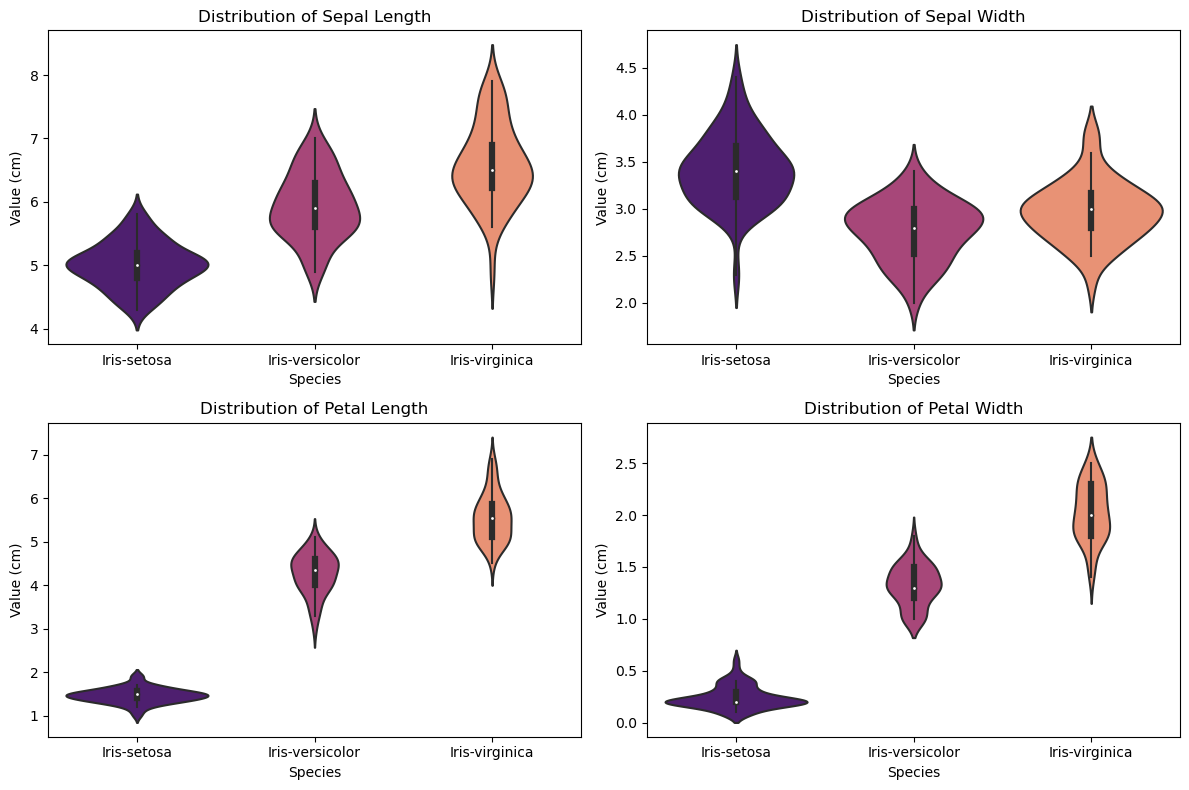

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, feat in zip(axes.flat, features):
    sns.violinplot(
        data=df, x="species", y=feat,
        palette="magma", ax=ax
    )
    ax.set_title(f"Distribution of {feat.replace('_',' ').title()}")
    ax.set_xlabel("Species")
    ax.set_ylabel("Value (cm)")

plt.tight_layout()
plt.savefig(os.path.join('plots', "violin_plots.png"))
plt.show()


For petal length and width, Setosa is completely separated from the other two species, which is consistent with histograms.\
Versicolor and Virginica overlap, though Virginica generally has larger values.\
For sepal length and width, all three species overlap more, showing these features are less useful for classification.\
Overall, violin plots confirm that petal features carry the strongest discriminatory power.

### Correlation matrix

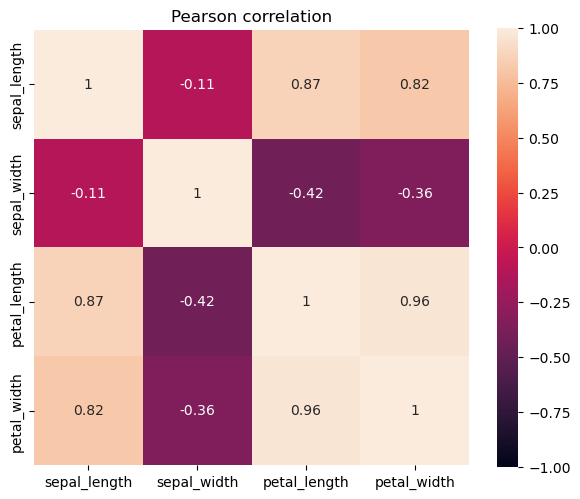

In [34]:
# Correlation heatmap
output_plot = "other_plots"
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, square=True)
plt.title("Pearson correlation")
plt.tight_layout()
plt.savefig(os.path.join('plots', 'correlation_heatmap.png'))
plt.show()

Values above 0.59 can be considered as "solid" correlation. Petal length is strongly correlated with petal width along with sepal length, while sepal width is not strongly correlated with any other variable.\
https://seaborn.pydata.org/generated/seaborn.heatmap.html

### Scatterplots

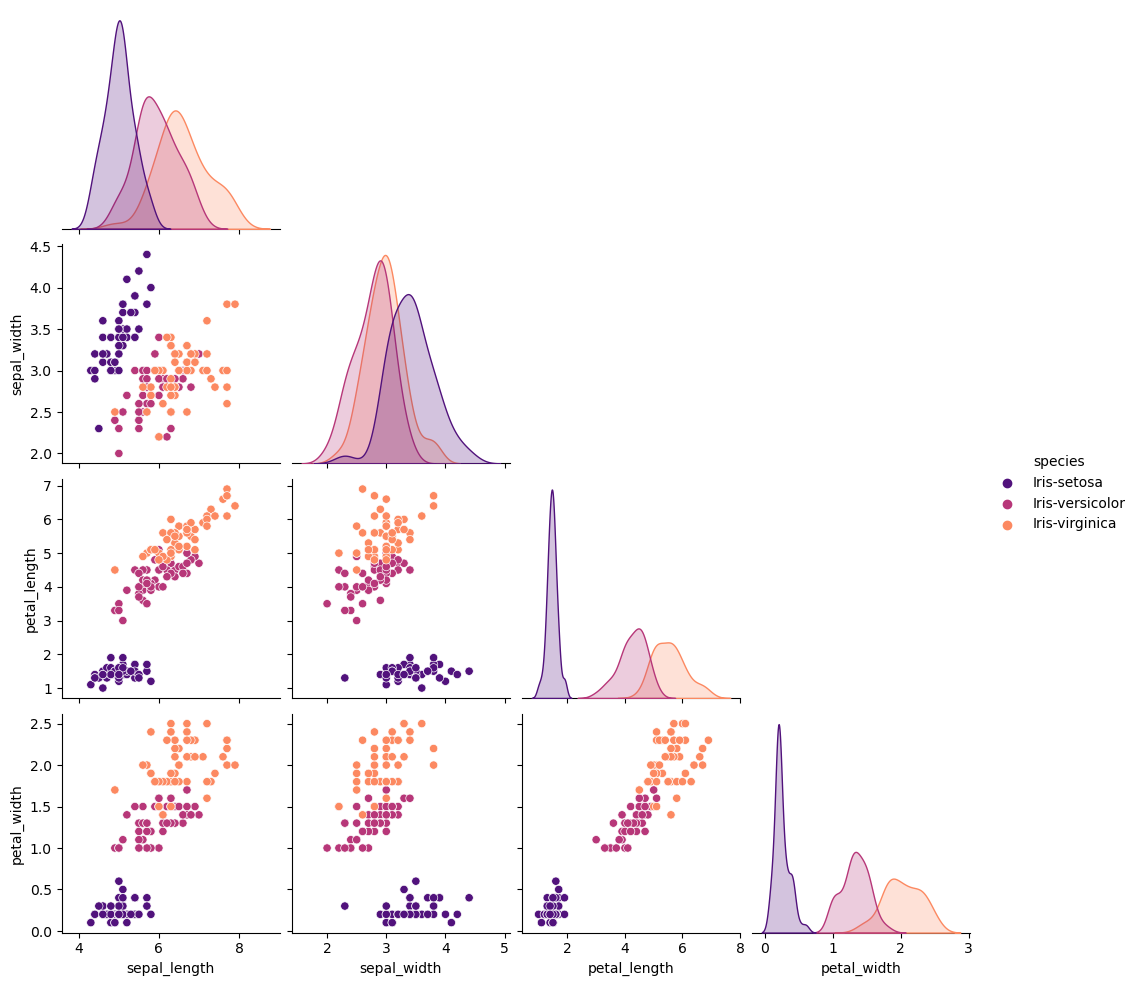

In [40]:
# Pairplot with species hue
sns.pairplot(df, hue="species", corner=True, diag_kind='kde', palette="magma")
plt.savefig(os.path.join('plots', 'pairplot.png'))
plt.show()

The pairplot shows the relationship between all pairs of features, with colors for each Iris species.\
Petal length vs. petal width: the strong positive correlation seen in the correlation matrix (≈0.96) is clearly visible as an almost straight line of points.\
Sepal length has moderate positive correlation with petal features, visible as slanted clouds.\
Sepal width shows weaker or even negative correlations, confirmed by the scattered patterns.\
Setosa is perfectly separated from the other species in petal features, while Versicolor and Virginica overlap.\
This confirms the numerical correlation results and visually highlights which features best discriminate the species.\
https://seaborn.pydata.org/generated/seaborn.scatterplot.html

## Classification

In [41]:
# Normality test (Shapiro-Wilk)
for feat in features:
    print(f"\nFeature: {feat}")
    for sp, group in df.groupby("species"):
        stat, p = shapiro(group[feat])
        print(f"  {sp:12s} | W={stat:.3f}, p={p:.5f} "
              f"| {'Normal ✅' if p > 0.05 else 'Not normal ❌'}")


Feature: sepal_length
  Iris-setosa  | W=0.978, p=0.45950 | Normal ✅
  Iris-versicolor | W=0.978, p=0.46474 | Normal ✅
  Iris-virginica | W=0.971, p=0.25831 | Normal ✅

Feature: sepal_width
  Iris-setosa  | W=0.969, p=0.20465 | Normal ✅
  Iris-versicolor | W=0.974, p=0.33798 | Normal ✅
  Iris-virginica | W=0.967, p=0.18090 | Normal ✅

Feature: petal_length
  Iris-setosa  | W=0.955, p=0.05465 | Normal ✅
  Iris-versicolor | W=0.966, p=0.15848 | Normal ✅
  Iris-virginica | W=0.962, p=0.10978 | Normal ✅

Feature: petal_width
  Iris-setosa  | W=0.814, p=0.00000 | Not normal ❌
  Iris-versicolor | W=0.948, p=0.02728 | Not normal ❌
  Iris-virginica | W=0.960, p=0.08695 | Normal ✅


I tested normality of distribution of features within each species with Shapiro=Wilk test.\
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [ ]:
# Search for outliers using IQR method
for feat in features:
    Q1 = df[feat].quantile(0.25)
    Q3 = df[feat].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[feat] < Q1 - 1.5*IQR) | (df[feat] > Q3 + 1.5*IQR)]
    print(f"{feat}: {len(outliers)} outliers")

sepal_length: 0 outliers
sepal_width: 4 outliers
petal_length: 0 outliers
petal_width: 0 outliers


I found some outliers.

In [ ]:
# Homogeneity of variances (Levene's test)
for col in features:
    groups = [g[col].values for _, g in df.groupby("species")]
    stat, p = levene(*groups)
    print(f"{col}: Levene stat={stat:.2f}, p={p:.5f}")

sepal_length: Levene stat=6.35, p=0.00226
sepal_width: Levene stat=0.65, p=0.52483
petal_length: Levene stat=19.72, p=0.00000
petal_width: Levene stat=19.41, p=0.00000


The Levene test tests the null hypothesis that all input samples are from populations with equal variances.Only sepal width is different than other features, when variances are compared\
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

In [43]:
#ANOVA across species for each feature
for col in features:
    groups = [g[col].values for _, g in df.groupby("species")]
    f, p = stats.f_oneway(*groups)
    print(f"{col}: ANOVA F={f:.2f}, p={p:.10f}")

# If any feature looks non-normal: use nonparametric alternative
for col in features:
    groups = [g[col].values for _, g in df.groupby("species")]
    h, p = stats.kruskal(*groups)
    print(f"{col}: Kruskal H={h:.2f}, p={p:.10f}")

sepal_length: ANOVA F=119.26, p=0.0000000000
sepal_width: ANOVA F=47.36, p=0.0000000000
petal_length: ANOVA F=1179.03, p=0.0000000000
petal_width: ANOVA F=959.32, p=0.0000000000
sepal_length: Kruskal H=96.94, p=0.0000000000
sepal_width: Kruskal H=62.49, p=0.0000000000
petal_length: Kruskal H=130.41, p=0.0000000000
petal_width: Kruskal H=131.09, p=0.0000000000


Before running ANOVA, I checked for outliers and normality. A few extreme values were found in sepal width, but they are consistent with real biological variation and not obvious data entry errors. Since ANOVA is sensitive to outliers and non-normal distribution of data, I also verified the results with the Kruskal–Wallis test, which is more robust to non-normality and extreme values. Both tests agreed, so I kept the outliers in the analysis. ANOVA and Kruskal–Wallis tests produced very small p-values (< 0.00001), indicating strong evidence against the null hypothesis of equal group means. This confirms that at least one species differs significantly from the others.\
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

In [ ]:
for feat in features:
    print(f"\nTukey HSD results for {feat}:\n")
    tukey = pairwise_tukeyhsd(df[feat], df["species"], alpha=0.05)
    print(tukey.summary())


Tukey HSD results for sepal_length:

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
     group1          group2     meandiff p-adj lower  upper  reject
-------------------------------------------------------------------
    Iris-setosa Iris-versicolor     0.93   0.0 0.6862 1.1738   True
    Iris-setosa  Iris-virginica    1.582   0.0 1.3382 1.8258   True
Iris-versicolor  Iris-virginica    0.652   0.0 0.4082 0.8958   True
-------------------------------------------------------------------

Tukey HSD results for sepal_width:

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj  lower   upper  reject
---------------------------------------------------------------------
    Iris-setosa Iris-versicolor   -0.648   0.0 -0.8092 -0.4868   True
    Iris-setosa  Iris-virginica   -0.444   0.0 -0.6052 -0.2828   True
Iris-versicolor  Iris-virginica    0.204 0.009  0.0428  0.3652   True
-----------------------------

Post-hoc Tukey test confirmed that the species are different from each other in every feature.

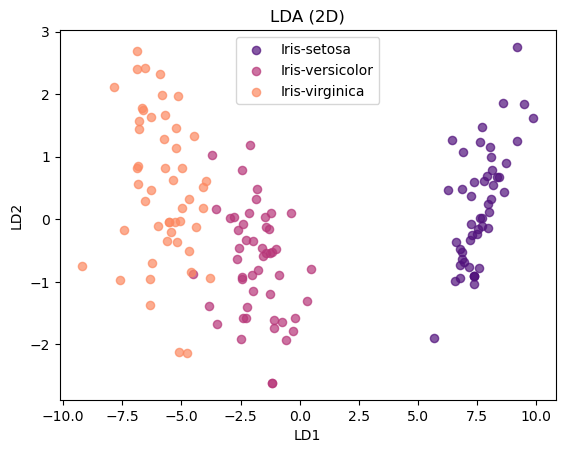

In [3]:
# Data preparation
X = df.drop(columns="species").values
y = df["species"].values
le = LabelEncoder()
y_enc = le.fit_transform(y)



# LDA 2D projection (max 2 components for 3 classes)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)
plt.figure()
colors = sns.color_palette("magma", 3)
for i, sp in enumerate(le.classes_):
    plt.scatter(X_lda[y_enc==i,0], X_lda[y_enc==i,1], label=sp, s=35, alpha=0.7, color=colors[i])
plt.legend();
plt.title("LDA (2D)");
plt.xlabel("LD1");
plt.ylabel("LD2");
plt.savefig(os.path.join('plots', 'lda_2d_projection.png'))
plt.show()


LDA reduces the 4D Iris dataset to 2D by finding axes that maximize species separation. The scatterplot of LD1 vs. LD2 shows that Setosa is perfectly separated, while Versicolor and Virginica overlap partially. This confirms that petal features dominate separation, and LDA effectively summarizes class structure.\
https://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html

In [24]:
# Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

models = {
    "LogisticRegression": Pipeline([("scaler", StandardScaler()), ("clf", LogisticRegression(max_iter=1000))]),
    "LDA": LinearDiscriminantAnalysis(),
    "DecisionTree": DecisionTreeClassifier(random_state=42)
}

# Helper: CV accuracy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
def cv_acc(name, est):
    scores = cross_val_score(est, X, y, cv=cv, scoring="accuracy")
    print(f"{name:>16} | CV Acc: {scores.mean():.3f} ± {scores.std():.3f}")

print("Cross-validated accuracy:")
for name, est in models.items():
    cv_acc(name, est)

# Final train on train set, evaluate on held-out test set
print("\nHeld-out test performance:")
for name, est in models.items():
    est.fit(X_train, y_train)
    y_pred = est.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name:>16} | Test Acc: {acc:.3f}")
    print(classification_report(y_test, y_pred, digits=3))
    


Cross-validated accuracy:
LogisticRegression | CV Acc: 0.953 ± 0.045
             LDA | CV Acc: 0.973 ± 0.039
    DecisionTree | CV Acc: 0.953 ± 0.034

Held-out test performance:
LogisticRegression | Test Acc: 0.921
                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        12
Iris-versicolor      0.857     0.923     0.889        13
 Iris-virginica      0.917     0.846     0.880        13

       accuracy                          0.921        38
      macro avg      0.925     0.923     0.923        38
   weighted avg      0.923     0.921     0.921        38

             LDA | Test Acc: 1.000
                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        12
Iris-versicolor      1.000     1.000     1.000        13
 Iris-virginica      1.000     1.000     1.000        13

       accuracy                          1.000        38
      macro avg      1.000     1.000     1.000        38
   

I compared three classification models on the Iris dataset: Logistic Regression, Linear Discriminant Analysis (LDA), and a Decision Tree.\
To estimate general performance, I used 5-fold stratified cross-validation. The mean and standard deviation of accuracy across folds show the stability of each model.\
I trained each model on the training set (75% of data) and evaluated it on a held-out test set (25%).\
For each model, I reported:\
-  Overall test accuracy.
-  A detailed classification report (precision, recall, F1-score).
-  A confusion matrix to visualize misclassifications.\
The best accuracy was reached with LDA.


***
### End